# Question


As a demonstration of a comprehensive application of core Natural Language Processing (NLP) techniques, I will delve into the text of "Alice's Adventures in Wonderland." The primary objective is to employ various NLP processes to gain insights. 

 analysis encompasses a range of tasks, including text handling, character and location identification, sentiment analysis, and word frequency exploration, evaluating the relationships between characters.

# Text Handling
- **Split text per chapter:** Divide the text into chapters to create distinct documents in the corpus.
- **Normalize each document:** Ensure consistency in formatting and style.
- **Create a summary of each chapter:** Distill key points for a quick overview.

# Places
- **Identify all locations:** Extract and list the different places mentioned in the text.

# Characters Analysis
- **Find all characters in each chapter and overall:** Compile a list of characters introduced in each chapter and across the entire text.
- **Named Entity Recognition (NER): Names:** Extract and categorize named entities, focusing on character names.
- **Part-of-Speech Tagging:** Analyze the roles and emotions of each character in each chapter.
- **Character Traits:** Identify and list character traits such as Courageous, Kind-hearted, Ambitious.
- **Named Entity Relationship:** Evaluate the strength of relationships between characters, visualize friendships, and illustrate character networks.

# Word Analysis
- **Word Frequency Analysis:** Explore non-English words or made-up terms, and identify their frequency.
- **Important Words (TF-IDF):** Determine the most crucial words (nouns, verbs) using TF-IDF for each chapter.

## Core imports

In [126]:
import re
import string
from collections import Counter

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy

from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Initialize WordNet lemmatizer and stopwords
lemma = WordNetLemmatizer()
stop = stopwords.words('english')

# Extend the list of punctuation marks
punctuations = list(string.punctuation)
# Add some more punctuation, as the list doesn't cover all cases.
punctuations.extend(['”', '–', '``', "''"])
stop = stop + punctuations

# Text Handling
- **Split text per chapter:** Divide the text into chapters to create distinct documents in the corpus.
- **Normalize each document:** Ensure consistency in formatting and style.
- **Create a summary of each chapter:** Distill key points for a quick overview.
- **Text Summarization:** Summarize essential information and highlight key themes.

## Split into chapters

In [ ]:
text_file_path = "alice_in_wonderland.txt"

# # Open the file and read its contents
# with open(text_file_path, 'r', encoding='utf-8') as file:
#     corpus = file.read()
# # print(corpus[500:])  # Print the first 500 characters as an example
    
# Want to start at chapter 1
    
# print(corpus)
# Read the content of the file
with open(text_file_path, 'r') as file:
    lines = file.readlines()

# Find the index of the line containing "CHAPTER I"
chapter_index = next((index for index, line in enumerate(lines) if "CHAPTER I" in line), None)

# Extract content from that line onwards
corpus = ''.join(lines[chapter_index:])

# Print or save the modified content
print(corpus)

We decompose the corpus into chapters.

In [ ]:
# Define a regular expression pattern to identify CHAPTER headings
chapter_pattern = re.compile(r'CHAPTER [IVXLCDM]+')

# Use nltk to tokenize the text into sentences
sentences = nltk.sent_tokenize(corpus)

# Initialize a list to store documents
documents = []

# Iterate through sentences and group them based on CHAPTER headings
current_document = []
for sentence in sentences:
    if chapter_pattern.search(sentence):
        # Start a new document when a CHAPTER heading is encountered
        if current_document:
            documents.append(' '.join(current_document))
        current_document = [f"{sentence}"]
    else:
        current_document.append(sentence)

# Add the last document to the list
if current_document:
    documents.append(' '.join(current_document))

In [ ]:
# Print the first 10 words for each document
for i, doc in enumerate(documents, start=1):
    first_10_words = ' '.join(doc.split()[:10])
    print(f"CHAPTER {i} - First 10 words:\n{first_10_words}\n")

## Normalise each chapter

In [134]:
# pick a sample document
doc=documents[0]

In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def normalize_document(document, stemmer=porter_stemmer, lemmatizer=wordnet_lemmatizer):
    """Noramlizes data by performing following steps:
        1. Changing each word in corpus to lowercase.
        2. Removing special characters and interpunction.
        3. Dividing text into tokens.
        4. Removing english stopwords.
        5. Stemming words.
        6. Lemmatizing words.
    """
    
    temp = document.lower()
    temp = re.sub(r"[^a-zA-Z0-9]", " ", temp)
    temp = word_tokenize(temp)
    temp = [t for t in temp if t not in stopwords.words("english")]
    temp = [porter_stemmer.stem(token) for token in temp]
    temp = [lemmatizer.lemmatize(token) for token in temp]
    return temp

In [ ]:
# ndoc=normalize_document(doc)
# ndoc

# Who are the main characters per chapter

In [ ]:
Different from all entites in each chapter.

In [163]:
# pick a sample document
doc=documents[1]

In [164]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def extract_characters(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Extract entities identified as persons
    characters = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

    return characters

# # Example usage
# document = "Alice was talking to Bob and Carol. Meanwhile, David was reading a book."
# # characters = extract_characters(document)


In [136]:
# doc

'                            CHAPTER I\n\n                      Down the Rabbit-Hole\n\n\n  Alice was beginning to get very tired of sitting by her sister\non the bank, and of having nothing to do:  once or twice she had\npeeped into the book her sister was reading, but it had no\npictures or conversations in it, `and what is the use of a book,\'\nthought Alice `without pictures or conversation?\' So she was considering in her own mind (as well as she could,\nfor the hot day made her feel very sleepy and stupid), whether\nthe pleasure of making a daisy-chain would be worth the trouble\nof getting up and picking the daisies, when suddenly a White\nRabbit with pink eyes ran close by her. There was nothing so VERY remarkable in that; nor did Alice\nthink it so VERY much out of the way to hear the Rabbit say to\nitself, `Oh dear! Oh dear! I shall be late!\' (when she thought\nit over afterwards, it occurred to her that she ought to have\nwondered at this, but at the time it all seemed quit

In [130]:
characters_by_chapter = {}

for i, doc in enumerate(documents):
    characters = extract_characters(doc)
    unique_characters = list(set(characters))
    
    # Print the unique characters
    print(f"Chapter {i+1}'s unique Characters:", unique_characters)
    
    # Store the unique characters in the dictionary
    characters_by_chapter[f'Chapter {i+1}'] = unique_characters

# Print the dictionary with characters for each chapter
print("Characters by Chapter:")
print(characters_by_chapter)


Chapter 1's unique Characters: ['Alice', 'Latitude', 'Longitude', 'NEVER']
Chapter 2's unique Characters: ['Mouse', 'Ada', 'Mabel', 'Duck', 'Alice', 'Lory', 'William', 'Latin Grammar', "ALICE'S"]
Chapter 3's unique Characters: ['Mouse', 'Shakespeare', 'Said', 'Edgar Atheling', 'Ma', 'Northumbria', 'Lory', 'Alice', 'Mercia', 'William', "remedies--'\n\n  `", 'Crab', "I'LL", 'Edwin']
Chapter 4's unique Characters: ['Mary Ann', 'Alice', 'chimney?--Nay', 'Jack', 'Pat', 'Brandy', 'Bill']
Chapter 5's unique Characters: ['Said', 'Allow', 'Alice', 'WILLIAM', 'Keep', 'William', 'Alice\nreplied']
Chapter 6's unique Characters: ['Footman', 'Queen', 'Alice', 'fig', 'Cheshire Puss', 'Hatter']
Chapter 7's unique Characters: ['Alice\nangrily', 'Queen', 'Elsie', 'Alice', 'muchness--', 'Hatter', 'well--']
Chapter 8's unique Characters: ['Miss', 'Knave', 'Queen', 'Kings', 'Alice', 'Majesty', 'Hush']
Chapter 9's unique Characters: ['Hjckrrh', 'Stretching', 'Queen', 'Seaography', 'Mystery', 'Alice', 'Gryph

In [ ]:
{'Chapter 1': ['Alice', 'Latitude', 'Longitude', 'NEVER'], 'Chapter 2': ['Mouse', 'Ada', 'Mabel', 'Duck', 'Alice', 'Lory', 'William', 'Latin Grammar', "ALICE'S"], 'Chapter 3': ['Mouse', 'Shakespeare', 'Said', 'Edgar Atheling', 'Ma', 'Northumbria', 'Lory', 'Alice', 'Mercia', 'William', "remedies--'\n\n  `", 'Crab', "I'LL", 'Edwin'], 'Chapter 4': ['Mary Ann', 'Alice', 'chimney?--Nay', 'Jack', 'Pat', 'Brandy', 'Bill'], 'Chapter 5': ['Said', 'Allow', 'Alice', 'WILLIAM', 'Keep', 'William', 'Alice\nreplied'], 'Chapter 6': ['Footman', 'Queen', 'Alice', 'fig', 'Cheshire Puss', 'Hatter'], 'Chapter 7': ['Alice\nangrily', 'Queen', 'Elsie', 'Alice', 'muchness--', 'Hatter', 'well--'], 'Chapter 8': ['Miss', 'Knave', 'Queen', 'Kings', 'Alice', 'Majesty', 'Hush'], 'Chapter 9': ['Hjckrrh', 'Stretching', 'Queen', 'Seaography', 'Mystery', 'Alice', 'Gryphon', 'Tis', 'Tut'], 'Chapter 10': ['Said', 'Dinn', 'Shark', 'this:--', 'Alice', 'Lobster Quadrille', 'WILLIAM', 'Lobster', 'Gryphon', 'Beau', 'Soup', 'Chorus', 'Panther', 'Shall', 'Soo'], 'Chapter 11': ['Knave', 'Queen', 'Alice', 'Hatter', 'Gryphon', 'Majesty', 'Stolen', 'Bill'], 'Chapter 12': ['Mouse', 'Knave', 'Queen', 'Stuff', 'Alice', 'Majesty', 'Adventures', 'Bill']}

How do you know if a character is a character? Characters may have two words in a name.

In [172]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def extract_characters(text, name_length=None):
    # Process the text with spaCy
    doc = nlp(text)

    # Extract entities identified as persons with specified name length
    characters = [
        ent.text
        for ent in doc.ents
        if ent.label_ == "PERSON" and (
            name_length is None or name_length == len(ent.text.split())
        )
    ]

    return characters

# Example usage
document = "Alice was talking to Bob and Matt. Meanwhile, David Williams was reading a book."


In [176]:

# Extract characters with 1-word names
characters_1_word = extract_characters(document, name_length=1)
print("Characters with 1-word names:", characters_1_word)

# Extract characters with 2-word names
characters_2_words = extract_characters(document, name_length=2)
print("Characters with 2-word names:", characters_2_words)

# Extract characters with 3-word names
characters_3_words = extract_characters(document, name_length=3)
print("Characters with 3-word names:", characters_3_words)
characters_1_word+characters_2_words

Characters with 1-word names: ['Alice', 'Bob', 'Matt']
Characters with 2-word names: ['David Williams']
Characters with 3-word names: []


['Alice', 'Bob', 'Matt', 'David Williams']

In [177]:

# Extract characters with 1-word names
characters_1_word = extract_characters(doc, name_length=1)
print("Characters with 1-word names:", characters_1_word)

# Extract characters with 2-word names
characters_2_words = extract_characters(doc, name_length=2)
print("Characters with 2-word names:", characters_2_words)

# Extract characters with 3-word names
characters_3_words = extract_characters(doc, name_length=3)
print("Characters with 3-word names:", characters_3_words)
characters_1_word+characters_2_words

Characters with 1-word names: ['Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Queen', 'Alice', 'Alice', 'Majesty', 'Queen', 'Knave', 'Queen', 'Alice', 'Majesty', 'Alice', 'Knave', 'Alice', 'Queen', 'Queen', 'Bill', 'Queen', 'Stuff', 'Alice', 'Queen', 'Alice', 'Queen', 'Alice', 'Alice', 'Alice', 'Adventures', 'Alice', 'Alice', 'Adventures', 'Alice', 'Mouse', 'Queen', 'Queen']
Characters with 2-word names: []
Characters with 3-word names: []


['Alice',
 'Alice',
 'Alice',
 'Alice',
 'Alice',
 'Alice',
 'Alice',
 'Alice',
 'Queen',
 'Alice',
 'Alice',
 'Majesty',
 'Queen',
 'Knave',
 'Queen',
 'Alice',
 'Majesty',
 'Alice',
 'Knave',
 'Alice',
 'Queen',
 'Queen',
 'Bill',
 'Queen',
 'Stuff',
 'Alice',
 'Queen',
 'Alice',
 'Queen',
 'Alice',
 'Alice',
 'Alice',
 'Adventures',
 'Alice',
 'Alice',
 'Adventures',
 'Alice',
 'Mouse',
 'Queen',
 'Queen']

In [ ]:
Spacy does not recognise all names.



In [173]:

characters_by_chapter = {}

for i, doc in enumerate(documents):
    characters_1 = extract_characters(doc, name_length=1)
    characters_2 = extract_characters(doc, name_length=2)
    characters_3 = extract_characters(doc, name_length=3)
    characters=characters_1+characters_2+characters_3

    unique_characters = list(set(characters))
    
    # Print the unique characters
    print(f"Chapter {i+1}'s unique Characters:", unique_characters)
    
    # Store the unique characters in the dictionary
    characters_by_chapter[f'Chapter {i+1}'] = unique_characters

# Print the dictionary with characters for each chapter
print("Characters by Chapter:")
print(characters_by_chapter)



Chapter 1's unique Characters: ['Alice', 'Latitude', 'Longitude', 'NEVER']
Chapter 2's unique Characters: ['Mouse', 'Ada', 'Mabel', 'Duck', 'Alice', 'Lory', 'William', 'Latin Grammar', "ALICE'S"]
Chapter 3's unique Characters: ['Mouse', 'Shakespeare', 'Said', 'Edgar Atheling', 'Ma', 'Northumbria', 'Lory', 'Alice', 'Mercia', 'William', "remedies--'\n\n  `", 'Crab', "I'LL", 'Edwin']
Chapter 4's unique Characters: ['Mary Ann', 'Alice', 'chimney?--Nay', 'Jack', 'Pat', 'Brandy', 'Bill']
Chapter 5's unique Characters: ['Said', 'Allow', 'Alice', 'WILLIAM', 'Keep', 'William', 'Alice\nreplied']
Chapter 6's unique Characters: ['Footman', 'Queen', 'Alice', 'fig', 'Cheshire Puss', 'Hatter']
Chapter 7's unique Characters: ['Alice\nangrily', 'Queen', 'Elsie', 'Alice', 'muchness--', 'Hatter', 'well--']
Chapter 8's unique Characters: ['Miss', 'Knave', 'Queen', 'Kings', 'Alice', 'Majesty', 'Hush']
Chapter 9's unique Characters: ['Hjckrrh', 'Stretching', 'Queen', 'Seaography', 'Mystery', 'Alice', 'Gryph

In [182]:
characters_by_chapter={'Chapter 1': ['Alice','Rabbit'], 
                       'Chapter 2': ['Mouse', 'Ada', 'Mabel', 'Duck', 'Alice', 'Lory', 'William', 'Latin Grammar'], 
                       'Chapter 3': ['Mouse', 'Shakespeare', 'Edgar Atheling', 'Ma', 'Northumbria', 'Lory', 'Alice', 'Mercia', 'William', 'Crab', 'Edwin'],
                         'Chapter 4': ['Mary Ann', 'Alice', 'Jack', 'Pat', 'Brandy', 'Bill'], 
                         'Chapter 5': [  'Alice', 'WILLIAM', 'William'], 
                         'Chapter 6': ['Footman', 'Queen', 'Alice', 'Cheshire', 'Hatter'],
                           'Chapter 7': ['Queen', 'Elsie', 'Alice', 'Hatter'], 
                           'Chapter 8': ['Miss', 'Knave', 'Queen', 'Kings', 'Alice', 'Majesty', 'Hush'], 
                           'Chapter 9': ['Queen', 'Alice', 'Gryphon'],
                             'Chapter 10': ['Dinn', 'Alice', 'WILLIAM', 'Lobster', 'Gryphon', 'Panther'],
                               'Chapter 11': ['Knave', 'Queen', 'Alice', 'Hatter', 'Gryphon', 'Bill'],
                                 'Chapter 12': ['Mouse', 'Knave', 'Queen', 'Alice', 'Bill']}


In [183]:
ndoc=" ".join(normalize_document(doc))
ndoc

'chapter xii alic evid cri alic quit forget flurri moment larg grown last minut jump hurri tip juri box edg skirt upset juryman head crowd lay sprawl remind much globe goldfish accident upset week oh beg pardon exclaim tone great dismay began pick quickli could accid goldfish kept run head vagu sort idea must collect put back juri box would die trial proceed said king grave voic juryman back proper place repeat great emphasi look hard alic said alic look juri box saw hast put lizard head downward poor littl thing wave tail melancholi way quit unabl move soon got put right signifi much said think would quit much use trial one way soon juri littl recov shock upset slate pencil found hand back set work dilig write histori accid except lizard seem much overcom anyth sit mouth open gaze roof court know busi king said alic noth said alic noth whatev persist king noth whatev said alic import king said turn juri begin write slate white rabbit interrupt unimport majesti mean cours said respect 

In [185]:
# doc = nlp(text)
# doc

I love using spaCy.

In [ ]:

characters_by_chapter = {}

for i, doc in enumerate(documents):
    i_chpt_charac_lst=characters_by_chapter[i]# chcarcter list 

    for char in i_chpt_charac_lst:
        count the number of appearances of char in doc and store in a dictionary called i_char_dictionary
    
    sum the values of i_char_dictionary and divide each value of i_char_dictionary by that value.

    use the new i_char_dictionary to construct a bargraph from 0-1 for chapter i

    I want a different color for each charact in a given bar

plot this total bar graph


C:\Users\RhysL\AppData\Local\Temp\ipykernel_12492\1429385589.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


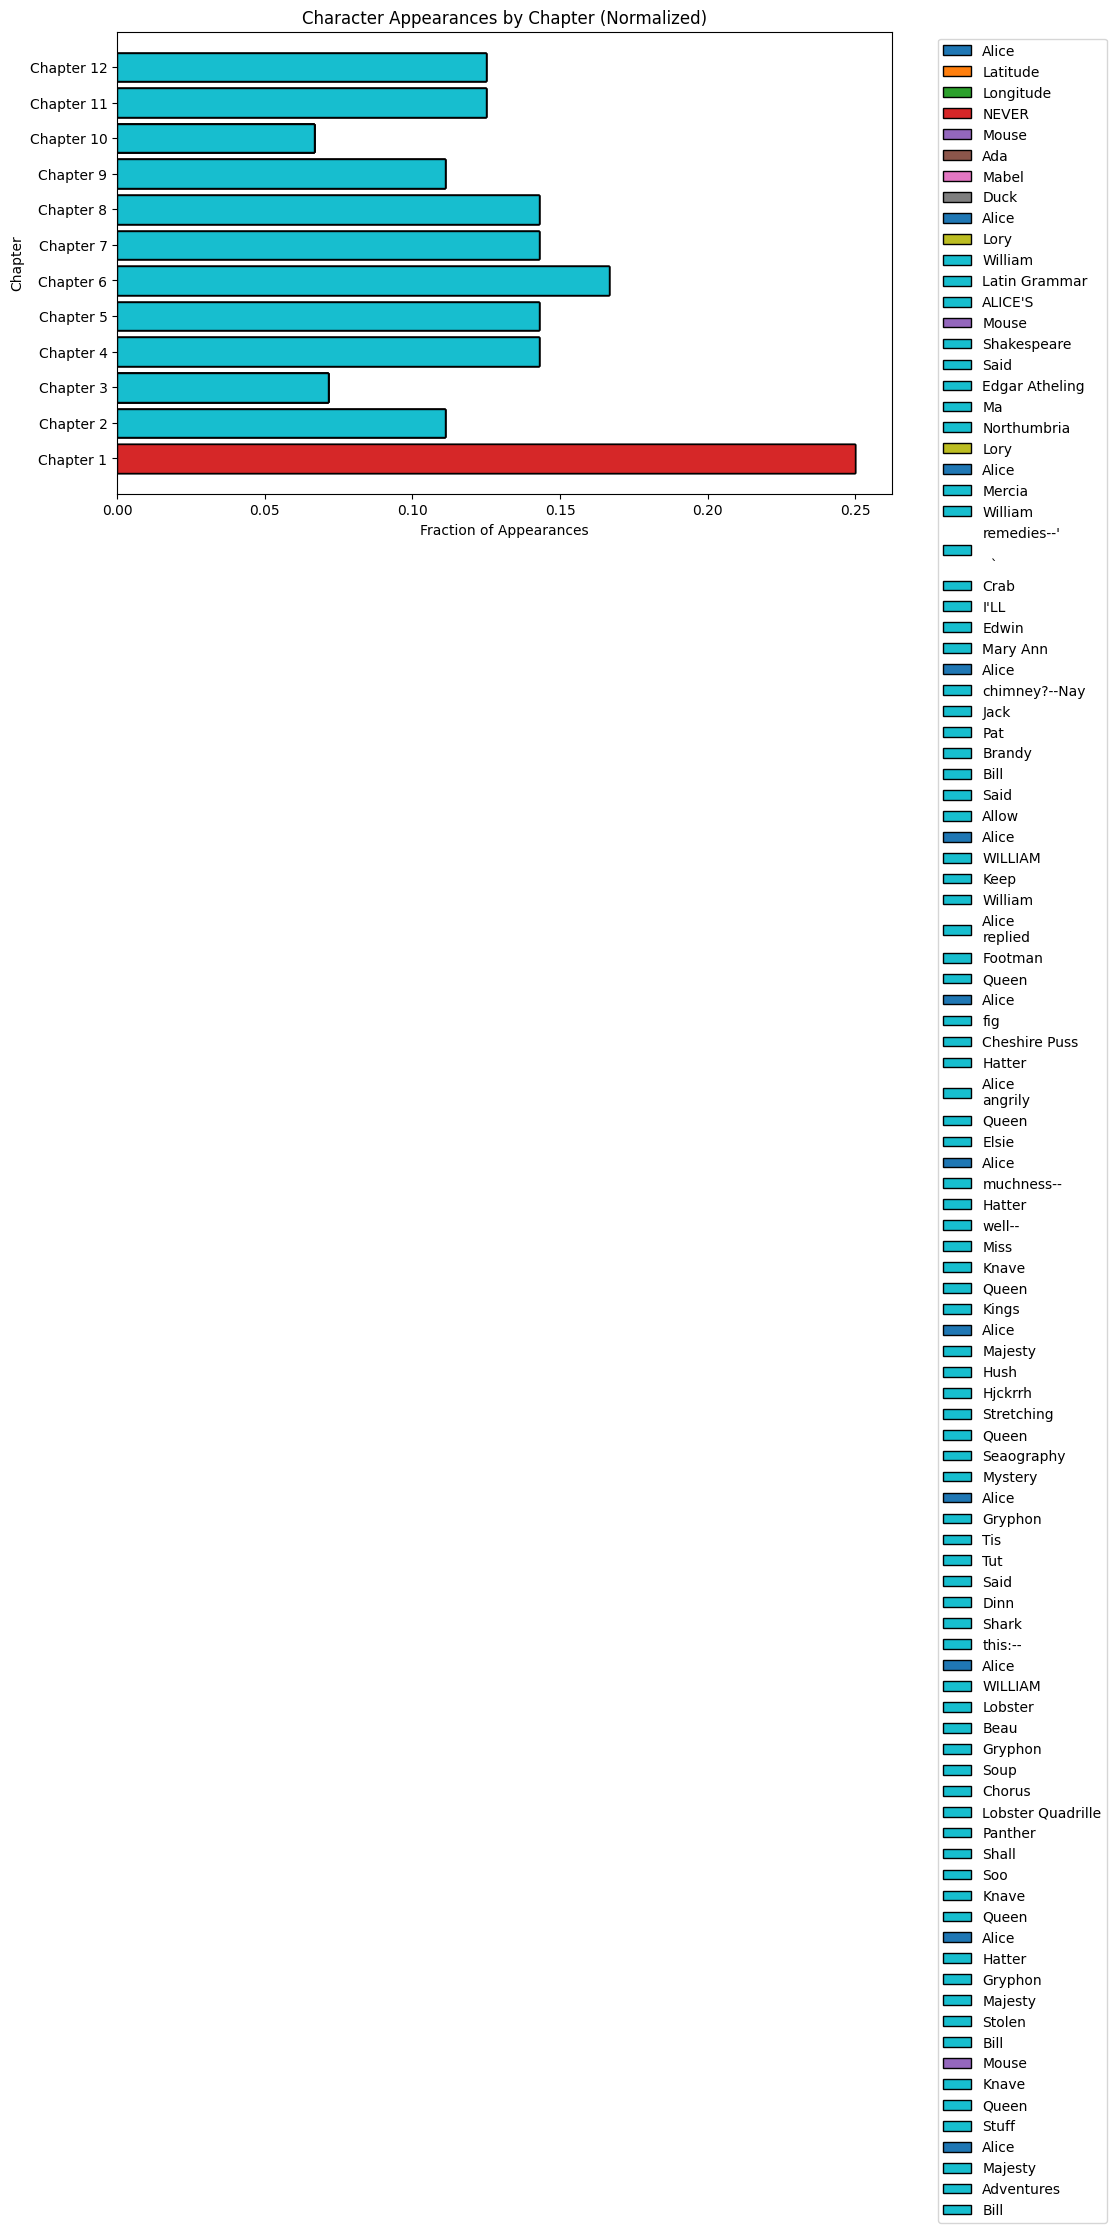

In [181]:
# Calculate the total appearance count for each character across all chapters
total_counts = Counter(character for characters in characters_by_chapter.values() for character in characters)


In [ ]:

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define a colormap with random colors for each character
colormap = {character: plt.cm.tab10(i) for i, character in enumerate(total_counts.keys())}

for i, (chapter, characters) in enumerate(characters_by_chapter.items(), start=1):
    i_char_dictionary = Counter(characters)
    
    # Normalize character counts by the total count for the chapter
    total_count_chapter = sum(i_char_dictionary.values())
    normalized_char_dictionary = {character: count / total_count_chapter for character, count in i_char_dictionary.items()}
    
    # Create horizontal bars for each character in the chapter with different colors
    for character, fraction in normalized_char_dictionary.items():
        color = colormap[character]
        ax.barh([i], fraction, color=color, label=character, edgecolor='black')

# Set labels and ticks
ax.set_yticks(range(1, len(characters_by_chapter) + 1))
ax.set_yticklabels(list(characters_by_chapter.keys()))
ax.set_xlabel('Fraction of Appearances')
ax.set_ylabel('Chapter')
ax.set_title('Character Appearances by Chapter (Normalized)')

# Create a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

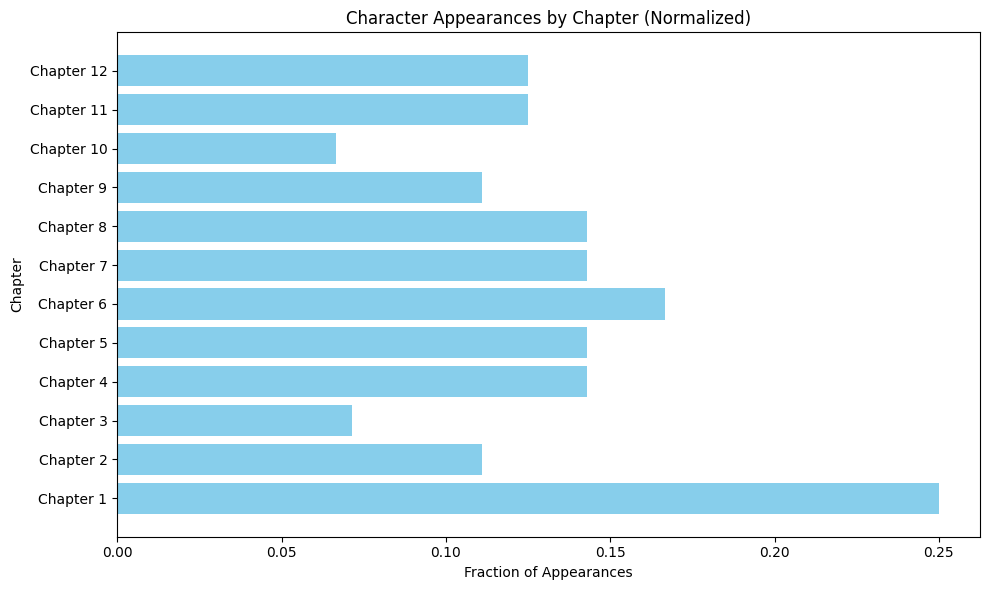

In [180]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for i, (chapter, characters) in enumerate(characters_by_chapter.items(), start=1):
    i_char_dictionary = Counter(characters)
    
    # Normalize character counts by the total count for the chapter
    total_count_chapter = sum(i_char_dictionary.values())
    normalized_char_dictionary = {character: count / total_count_chapter for character, count in i_char_dictionary.items()}
    
    # Create horizontal bars for each character in the chapter
    ax.barh([i] * len(normalized_char_dictionary), normalized_char_dictionary.values(), color='skyblue')

# Set labels and ticks
ax.set_yticks(range(1, len(characters_by_chapter) + 1))
ax.set_yticklabels(list(characters_by_chapter.keys()))
ax.set_xlabel('Fraction of Appearances')
ax.set_ylabel('Chapter')
ax.set_title('Character Appearances by Chapter (Normalized)')

plt.tight_layout()
plt.show()

If you want a horizontal bar chart where each bar represents a chapter, and the length of each bar is determined by the fraction of appearances of each character within that chapter, you can modify the code as follows:

In [179]:
import matplotlib.pyplot as plt


In [ ]:

# Plotting
for chapter, characters in characters_by_chapter.items():
    character_counts = {character: characters.count(character) for character in characters}
    
    plt.figure(figsize=(10, 6))
    plt.bar(character_counts.keys(), character_counts.values(), color='skyblue')
    plt.title(f'Character Appearance in {chapter}')
    plt.xlabel('Character')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# all chacters in the book.

Who are all the enitites in the book per chapter.

In [ ]:
Alice

White Rabbit
Cheshire Cat
Caterpillar
Queen of Hearts

King of Hearts

Mad Hatter

March Hare

Mary Ann

Old Crab with daughter

Duck
Lory
Eaglet
Pigeon
Two
Five
Seven

Bill

Frog-Footman

Duchess

 Gryphon
 Mock Turtle
 Dodo
 White Queen
 Red Queen
Tweedledee and Tweedledum

Knave of Hearts

Mouse

Dormouse

Alice's sister

## Summarisation? 

### seperate doc into sentences.

In [ ]:

# Your document
document = "This is the first sentence. This is the second sentence. And this is the third sentence."

# Tokenize the document into sentences
sentences = nltk.sent_tokenize(doc)

# Print the sentences
for i, sentence in enumerate(sentences, start=1):
    print(f"Sentence {i}: {sentence}")



# Places
- **Identify all locations:** Extract and list the different places mentioned in the text.



# Characters Analysis
- **Find all characters in each chapter and overall:** Compile a list of characters introduced in each chapter and across the entire text.
- **Named Entity Recognition (NER): Names:** Extract and categorize named entities, focusing on character names.
- **Part-of-Speech Tagging:** Analyze the roles and emotions of each character in each chapter.
- **Character Traits:** Identify and list character traits such as Courageous, Kind-hearted, Ambitious.
- **Named Entity Relationship:** Evaluate the strength of relationships between characters, visualize friendships, and illustrate character networks.



# Word Analysis
- **Word Frequency Analysis:** Explore non-English words or made-up terms, and identify their frequency.
- **Important Words (TF-IDF):** Determine the most crucial words (nouns, verbs) using TF-IDF for each chapter.



# Hard
- **Language Model Evaluation:** Assess the model's ability to predict Alice's responses in specific situations.